In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse as sp
from scipy.sparse import linalg
plt.style.use('dark_background')

In [2]:
h = 0.1
lx, ly = np.pi, np.pi
nx, ny = int(np.round(lx/h)), int(np.round(ly/h))
hx, hy = lx/nx, ly/ny
x = np.linspace(0.5*hx, lx-0.5*hx, nx)
y = np.linspace(0.5*hy, ly-0.5*hy, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

In [3]:
def exact(x, y):
    return np.exp(-np.cos(2*x))*np.sin(2*y)

def RHS(X, Y):
    return np.exp(-np.cos(2*X))*np.sin(2*Y)*(2*np.cos(2*X)-1)**2

def OpL_LIL(hx, hy, nx, ny):
    k = np.arange(nx*ny, dtype=int).reshape((nx, ny)) 
    L = sp.lil_matrix((nx*ny, nx*ny))
    for i in range(nx):
        for j in range(ny):
            L[k[i, j], k[i, j]] += 2.0/hy**2+2.0/hx**2+1
            L[k[i, j], k[i, (j-1)%ny]] = -1.0/hy**2
            L[k[i, j], k[i, (j+1)%ny]] = -1.0/hy**2
            L[k[i, j], k[(i-1)%nx, j]] = -1.0/hx**2
            L[k[i, j], k[(i+1)%nx, j]] = -1.0/hx**2
    return L.tocsr()

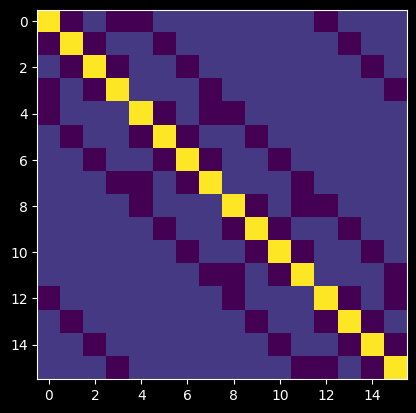

In [4]:
plt.imshow(OpL_LIL(1, 1, 4, 4).toarray());

In [11]:
import pandas as pd
pd.DataFrame(OpL_LIL(1, 1, 4, 4).toarray()).to_csv('D:/other/data.csv', index=False)

In [16]:
L = OpL_LIL(hx, hy, nx, ny)
F = RHS(X, Y).flatten()
u1 = linalg.spsolve(L, F).reshape((nx, ny))
u2, b = linalg.bicgstab(L, F)
u2 = u2.reshape((nx, ny))
u3, b = linalg.gmres(L, F)
u3 = u3.reshape((nx, ny))

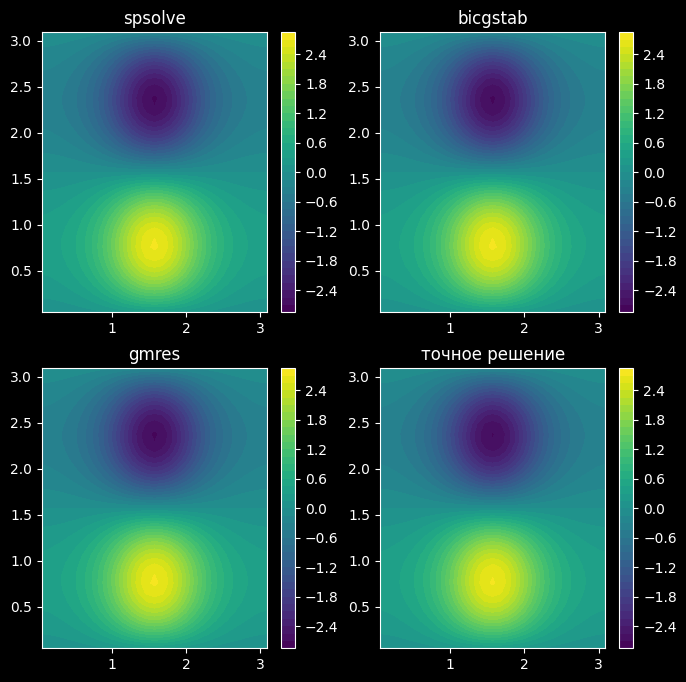

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax0 = ax[0, 0].contourf(X, Y, u1, levels=50)
ax[0, 0].set_title('spsolve')
ax1 = ax[0, 1].contourf(X, Y, u2, levels=50)
ax[0, 1].set_title('bicgstab')
ax2 = ax[1, 0].contourf(X, Y, u3, levels=50)
ax[1, 0].set_title('gmres')
ax3 = ax[1, 1].contourf(X, Y, exact(X, Y), levels=50)
ax[1, 1].set_title('точное решение')
fig.colorbar(ax0)
fig.colorbar(ax1)
fig.colorbar(ax2)
fig.colorbar(ax3);

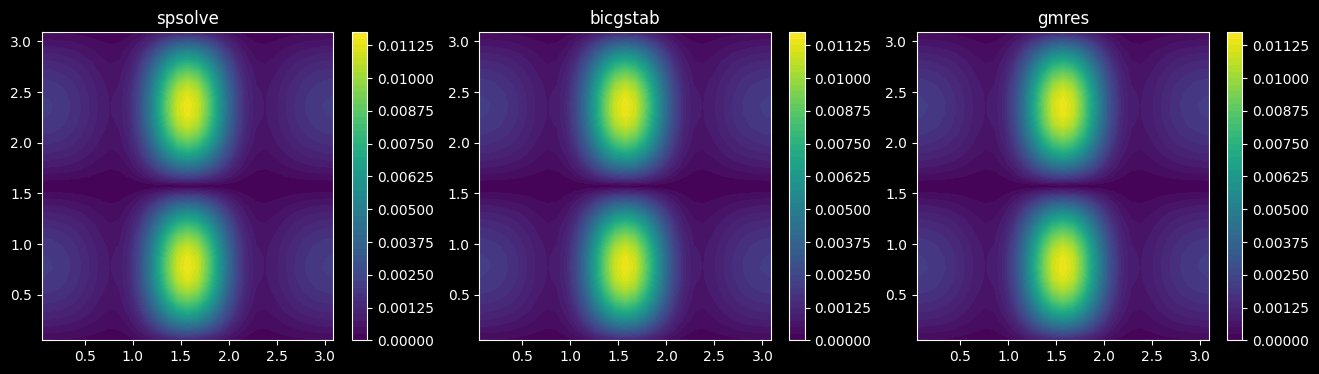

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax0 = ax[0].contourf(X, Y, np.abs(u1-exact(X, Y)), levels=50)
ax[0].set_title('spsolve')
ax1 = ax[1].contourf(X, Y, np.abs(u2-exact(X, Y)), levels=50)
ax[1].set_title('bicgstab')
ax2 = ax[2].contourf(X, Y, np.abs(u3-exact(X, Y)), levels=50)
ax[2].set_title('gmres')
fig.colorbar(ax0)
fig.colorbar(ax1)
fig.colorbar(ax2);